In [2]:
import pandas as pd
labels = pd.read_csv('/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv')
labels.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [3]:
labels.shape

(30227, 6)

In [4]:
labels.describe()

x            y        width       height        Target
count  9555.000000  9555.000000  9555.000000  9555.000000  30227.000000
mean    394.047724   366.839560   218.471376   329.269702      0.316108
std     204.574172   148.940488    59.289475   157.750755      0.464963
min       2.000000     2.000000    40.000000    45.000000      0.000000
25%     207.000000   249.000000   177.000000   203.000000      0.000000
50%     324.000000   365.000000   217.000000   298.000000      0.000000
75%     594.000000   478.500000   259.000000   438.000000      1.000000
max     835.000000   881.000000   528.000000   942.000000      1.000000

In [5]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [6]:
labels.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [7]:
labels[labels['Target']==1].isnull().sum()

patientId    0
x            0
y            0
width        0
height       0
Target       0
dtype: int64

In [8]:
labels[labels.isnull().any(axis=1)].Target.value_counts()

0    20672
Name: Target, dtype: int64

In [9]:
labels[~labels.isnull().any(axis=1)].Target.value_counts()

1    9555
Name: Target, dtype: int64

In [10]:
9555+20672

30227

In [11]:
labels.Target.value_counts()

0    20672
1     9555
Name: Target, dtype: int64

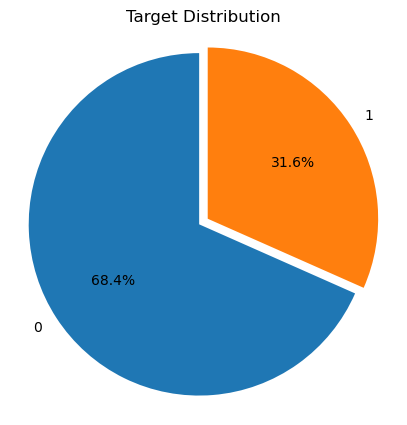

In [12]:
import matplotlib.pyplot as plt
labels_count = labels.Target.value_counts()
fig1, axs1 = plt.subplots(figsize=(5, 5))
axs1.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', startangle=90, explode=(0.03, 0.03))
axs1.axis('equal')
plt.title('Target Distribution')
plt.show()

In [13]:
labels.patientId.is_unique

False

In [14]:
duplicatedRowsDF = labels[labels.duplicated(['patientId'])]
duplicatedRowsDF.head()

patientId      x      y  width  height  Target
5   00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1
9   00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1
15  00aecb01-a116-45a2-956c-08d2fa55433f  547.0  299.0  119.0   165.0       1
17  00c0b293-48e7-4e16-ac76-9269ba535a62  650.0  511.0  206.0   284.0       1
20  00f08de1-517e-4652-a04f-d1dc9ee48593  571.0  275.0  230.0   476.0       1

In [15]:
duplicatedRowsDF.shape

(3543, 6)

In [16]:
labels[labels.patientId=='00436515-870c-4b36-a041-de91049b9ab4']

patientId      x      y  width  height  Target
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1

In [17]:
labels[labels.patientId=='00c0b293-48e7-4e16-ac76-9269ba535a62']

patientId      x      y  width  height  Target
16  00c0b293-48e7-4e16-ac76-9269ba535a62  306.0  544.0  168.0   244.0       1
17  00c0b293-48e7-4e16-ac76-9269ba535a62  650.0  511.0  206.0   284.0       1

In [18]:
class_labels = pd.read_csv('/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv')
class_labels.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [19]:
class_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [20]:
class_labels.shape

(30227, 2)

In [21]:
class_labels.describe()

patientId                         class
count                                  30227                         30227
unique                                 26684                             3
top     3239951b-6211-4290-b237-3d9ad17176db  No Lung Opacity / Not Normal
freq                                       4                         11821

In [22]:
class_labels['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

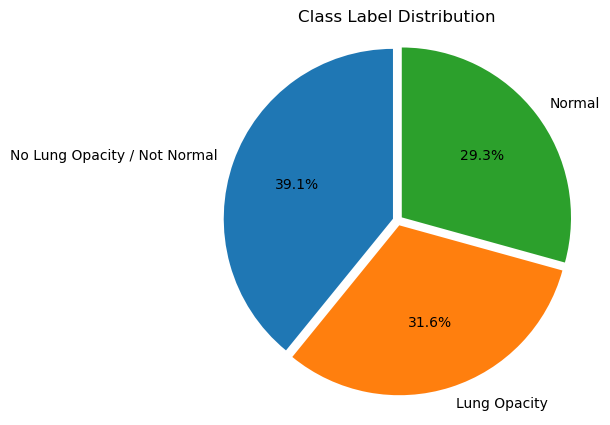

In [23]:
import matplotlib.pyplot as plt
labels_count = class_labels['class'].value_counts()
fig1, axs1 = plt.subplots(figsize=(5, 5))
axs1.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', startangle=90, explode=(0.03, 0.03, 0.03))
axs1.axis('equal')
plt.title('Class Label Distribution')
plt.show()

In [24]:
duplicatedClassRowDF = class_labels[class_labels.duplicated(['patientId'])]
duplicatedClassRowDF.head()

patientId         class
5   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
9   00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
15  00aecb01-a116-45a2-956c-08d2fa55433f  Lung Opacity
17  00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity
20  00f08de1-517e-4652-a04f-d1dc9ee48593  Lung Opacity

In [25]:
duplicatedClassRowDF.describe()

patientId         class
count                                   3543          3543
unique                                  3398             1
top     ee820aa5-4804-4984-97b3-f0a71d69702f  Lung Opacity
freq                                       3          3543

In [26]:
duplicatedClassRowDF.shape

(3543, 2)

In [27]:
class_labels[class_labels['patientId']=='00436515-870c-4b36-a041-de91049b9ab4']

patientId         class
4  00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
5  00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity

In [28]:
class_labels[class_labels['patientId']=='00c0b293-48e7-4e16-ac76-9269ba535a62']

patientId         class
16  00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity
17  00c0b293-48e7-4e16-ac76-9269ba535a62  Lung Opacity

In [29]:
c, f = 0, 0
for i in range(labels.shape[0]):
    if labels.iloc[i]['patientId']==class_labels.iloc[i]['patientId']:
        c+=1
    else:
        f+=1
print(c, f)

30227 0


In [30]:
## Creating the training data

train_data = pd.concat([labels, class_labels['class']], axis=1)
train_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [32]:
train_data.describe()

x            y        width       height        Target
count  9555.000000  9555.000000  9555.000000  9555.000000  30227.000000
mean    394.047724   366.839560   218.471376   329.269702      0.316108
std     204.574172   148.940488    59.289475   157.750755      0.464963
min       2.000000     2.000000    40.000000    45.000000      0.000000
25%     207.000000   249.000000   177.000000   203.000000      0.000000
50%     324.000000   365.000000   217.000000   298.000000      0.000000
75%     594.000000   478.500000   259.000000   438.000000      1.000000
max     835.000000   881.000000   528.000000   942.000000      1.000000

In [33]:
temp_df = train_data.groupby('Target')['class'].value_counts()
temp_df.head()

Target  class                       
0       No Lung Opacity / Not Normal    11821
        Normal                           8851
1       Lung Opacity                     9555
Name: class, dtype: int64

In [34]:
data_target_class = pd.DataFrame({'values':temp_df.values}, index=temp_df.index).reset_index()
data_target_class

Target                         class  values
0       0  No Lung Opacity / Not Normal   11821
1       0                        Normal    8851
2       1                  Lung Opacity    9555

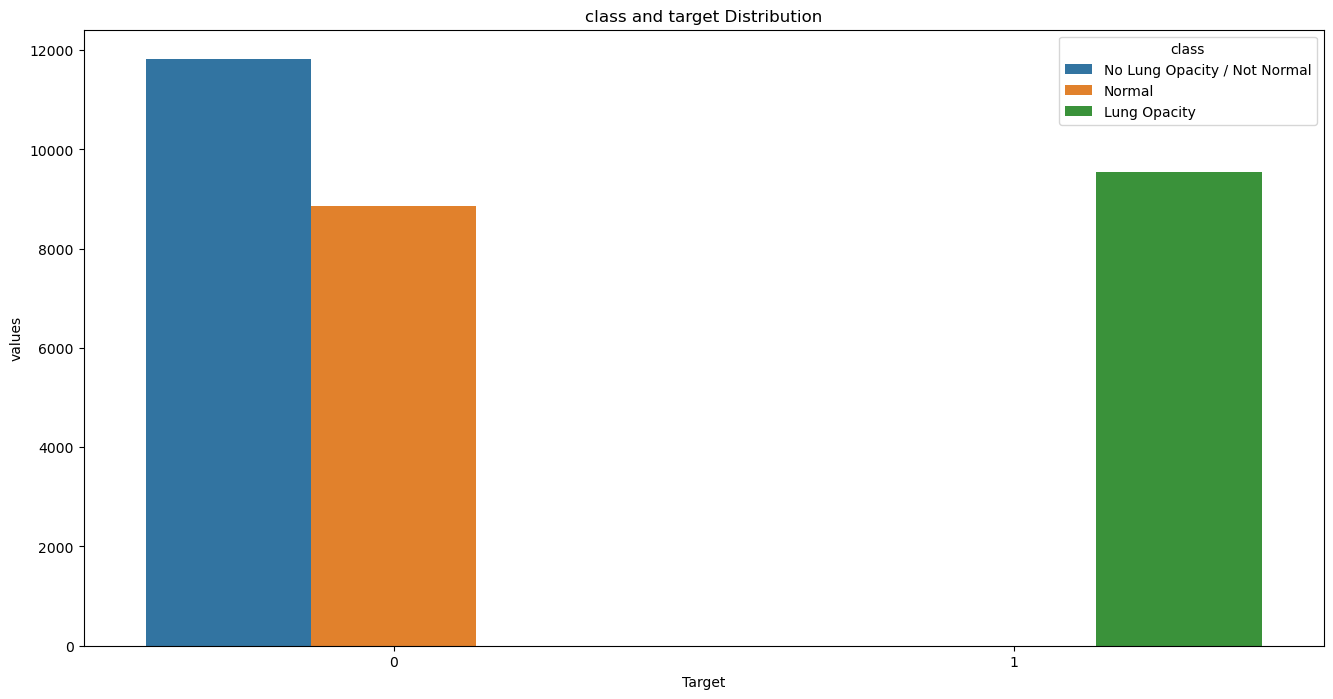

In [35]:
import seaborn as sns
fig2, axs2 = plt.subplots(figsize=(16, 8))
sns.barplot(ax=axs2, x='Target', y='values', hue='class', data = data_target_class)
plt.title('class and target Distribution')
plt.show()

## Analysing the Dicom Image

In [36]:
import matplotlib.patches as patches

In [37]:
import pydicom as dcm
import math
def ImageAnalysis(data):
    img_data = list(data.T.to_dict().values())
    fig, ax = plt.subplots(3, 3, figsize=(16, 18))
    for i, row in enumerate(img_data):
        patientImg = row['patientId']
        dcm_file = '/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/'+patientImg+'.dcm'
        data_row_img_data = dcm.read_file(dcm_file)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(dcm_file)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\Bounds: {}:{}:{}:{}'.format(
                row['patientId'],
                modality, age, sex, row['Target'], row['class'], 
                row['x'],row['y'],row['width'],row['height']))
        label = row["class"]
        if not math.isnan(row['x']):
            x, y, width, height  =  row['x'],row['y'],row['width'],row['height']
            rect = patches.Rectangle((x, y),width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
            ax[i//3, i%3].add_patch(rect)

    plt.show()

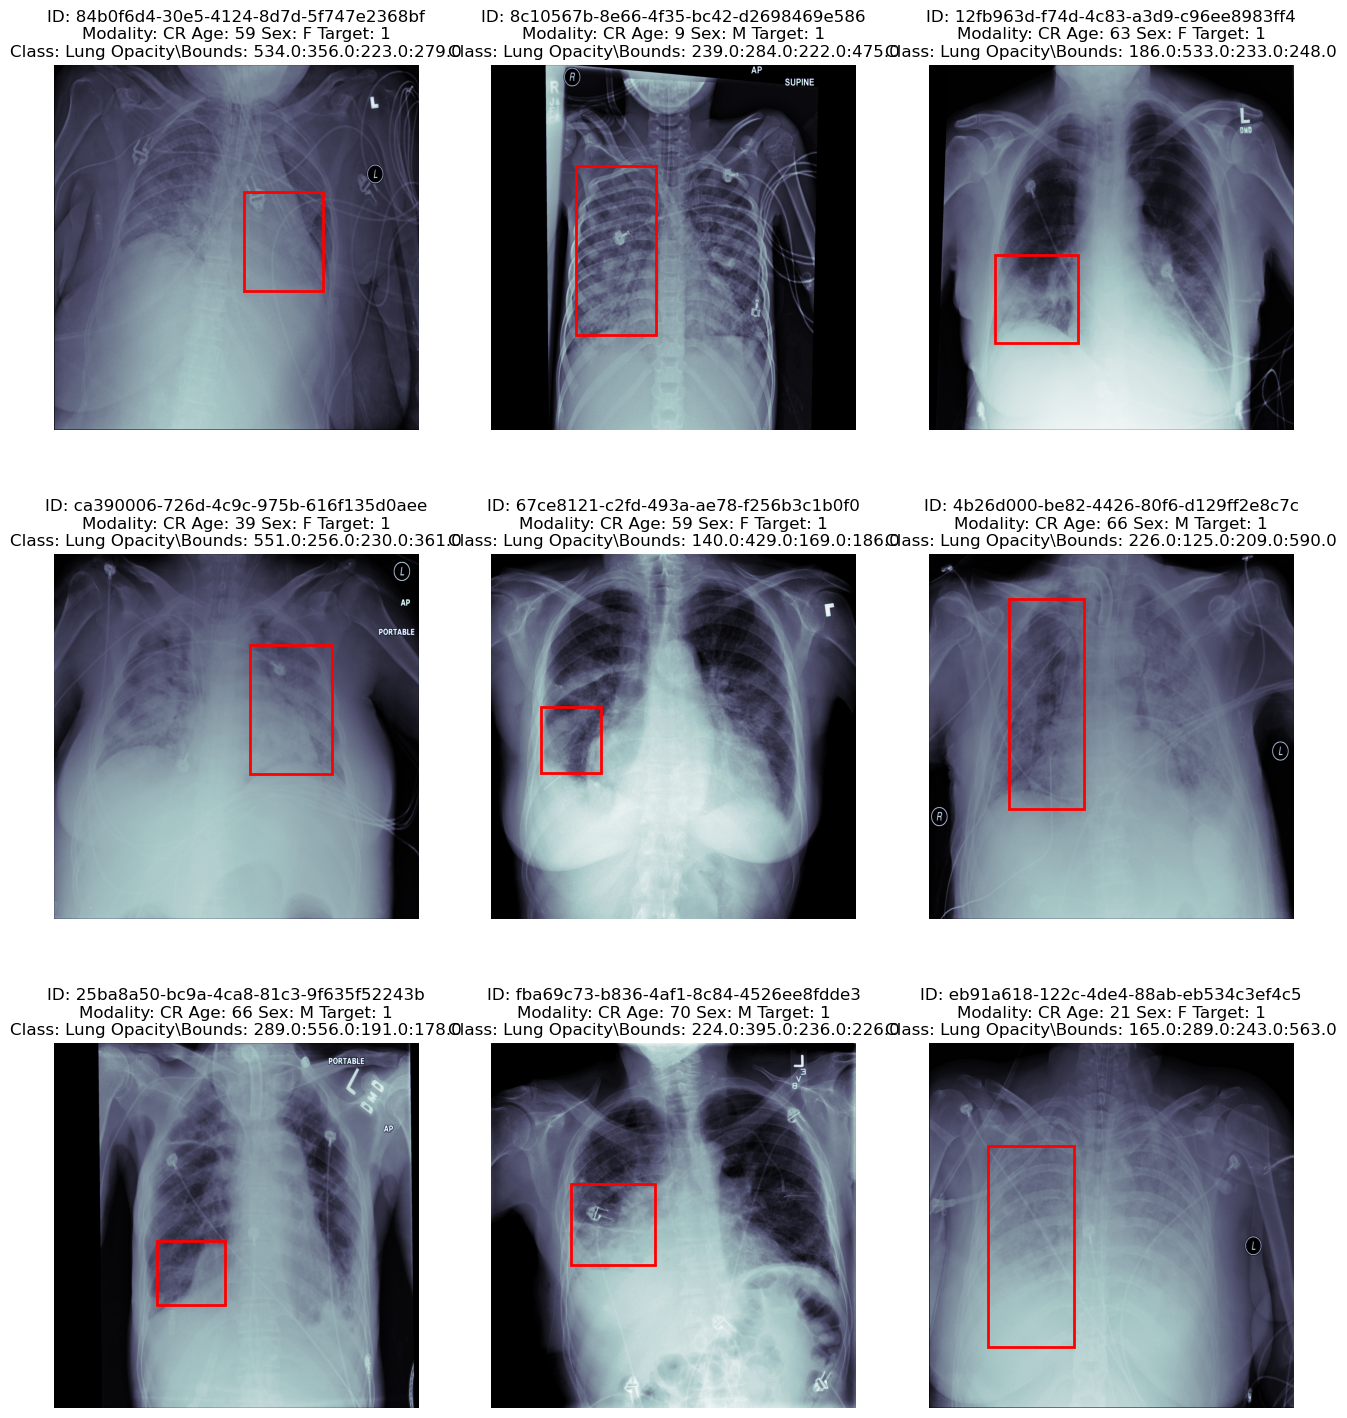

In [38]:
ImageAnalysis(train_data[train_data['Target']==1].sample(9))

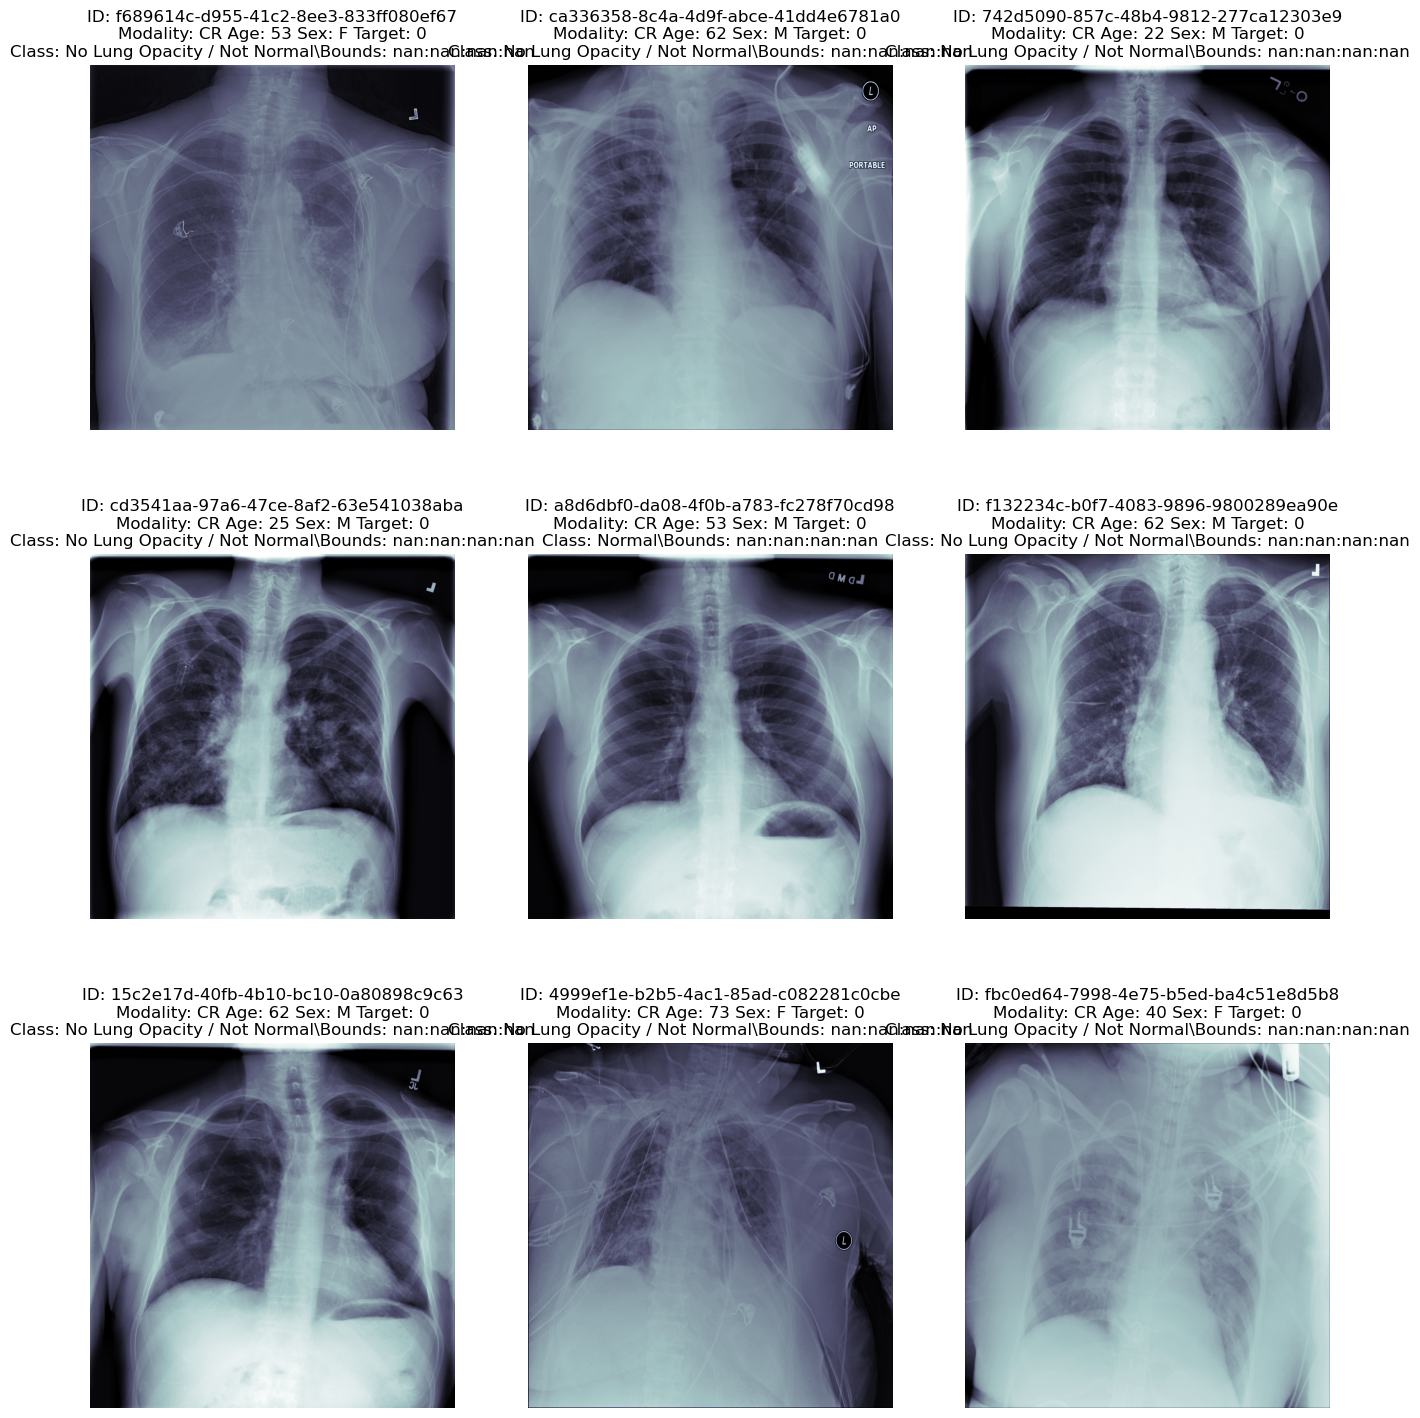

In [39]:
ImageAnalysis(train_data[train_data['Target']==0].sample(9))

In [40]:
list(train_data.sample(9).T.to_dict().values())

[{'patientId': '64a18f17-de76-44d1-9d6e-16267870298b',
  'x': nan,
  'y': nan,
  'width': nan,
  'height': nan,
  'Target': 0,
  'class': 'No Lung Opacity / Not Normal'},
 {'patientId': '25e49cde-cdd9-47ba-9e3c-bc8406433240',
  'x': 239.0,
  'y': 299.0,
  'width': 111.0,
  'height': 185.0,
  'Target': 1,
  'class': 'Lung Opacity'},
 {'patientId': '156634a8-5ca7-4822-92cd-677aedc2247a',
  'x': 730.0,
  'y': 422.0,
  'width': 135.0,
  'height': 260.0,
  'Target': 1,
  'class': 'Lung Opacity'},
 {'patientId': '8361600c-fe3d-4d7c-9f1b-1cb043713c0a',
  'x': nan,
  'y': nan,
  'width': nan,
  'height': nan,
  'Target': 0,
  'class': 'Normal'},
 {'patientId': '8b2e953f-7c4d-48ee-ada6-8d12f1b4025a',
  'x': 575.0,
  'y': 461.0,
  'width': 222.0,
  'height': 428.0,
  'Target': 1,
  'class': 'Lung Opacity'},
 {'patientId': 'd0ca74f7-0792-4399-839c-63ea481412e0',
  'x': nan,
  'y': nan,
  'width': nan,
  'height': nan,
  'Target': 0,
  'class': 'No Lung Opacity / Not Normal'},
 {'patientId': '94c2

In [41]:
ds = dcm.read_file('/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm')
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [42]:
def readDCMData(rowData):
    dcm_file = '/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/'+rowData.patientId+'.dcm'
    ds = dcm.read_file(dcm_file)
    img = ds.pixel_array
    return ds.PatientSex, ds.PatientAge

In [43]:
train_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

In [44]:
train_data['sex'], train_data['age'] = zip(*train_data.apply(readDCMData, axis=1))

In [53]:
train_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class sex  age  
0  No Lung Opacity / Not Normal   F   51  
1  No Lung Opacity / Not Normal   F   48  
2  No Lung Opacity / Not Normal   M   19  
3                        Normal   M   28  
4                  Lung Opacity   F   32

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
 7   sex        30227 non-null  object 
 8   age        30227 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 2.1+ MB


In [47]:
train_data['age'] = train_data.age.astype(int)

In [50]:
train_data.describe().T

count        mean         std   min    25%    50%    75%    max
x        9555.0  394.047724  204.574172   2.0  207.0  324.0  594.0  835.0
y        9555.0  366.839560  148.940488   2.0  249.0  365.0  478.5  881.0
width    9555.0  218.471376   59.289475  40.0  177.0  217.0  259.0  528.0
height   9555.0  329.269702  157.750755  45.0  203.0  298.0  438.0  942.0
Target  30227.0    0.316108    0.464963   0.0    0.0    0.0    1.0    1.0
age     30227.0   46.797764   16.892940   1.0   34.0   49.0   59.0  155.0

In [54]:
train_data.sex.value_counts()

M    17216
F    13011
Name: sex, dtype: int64

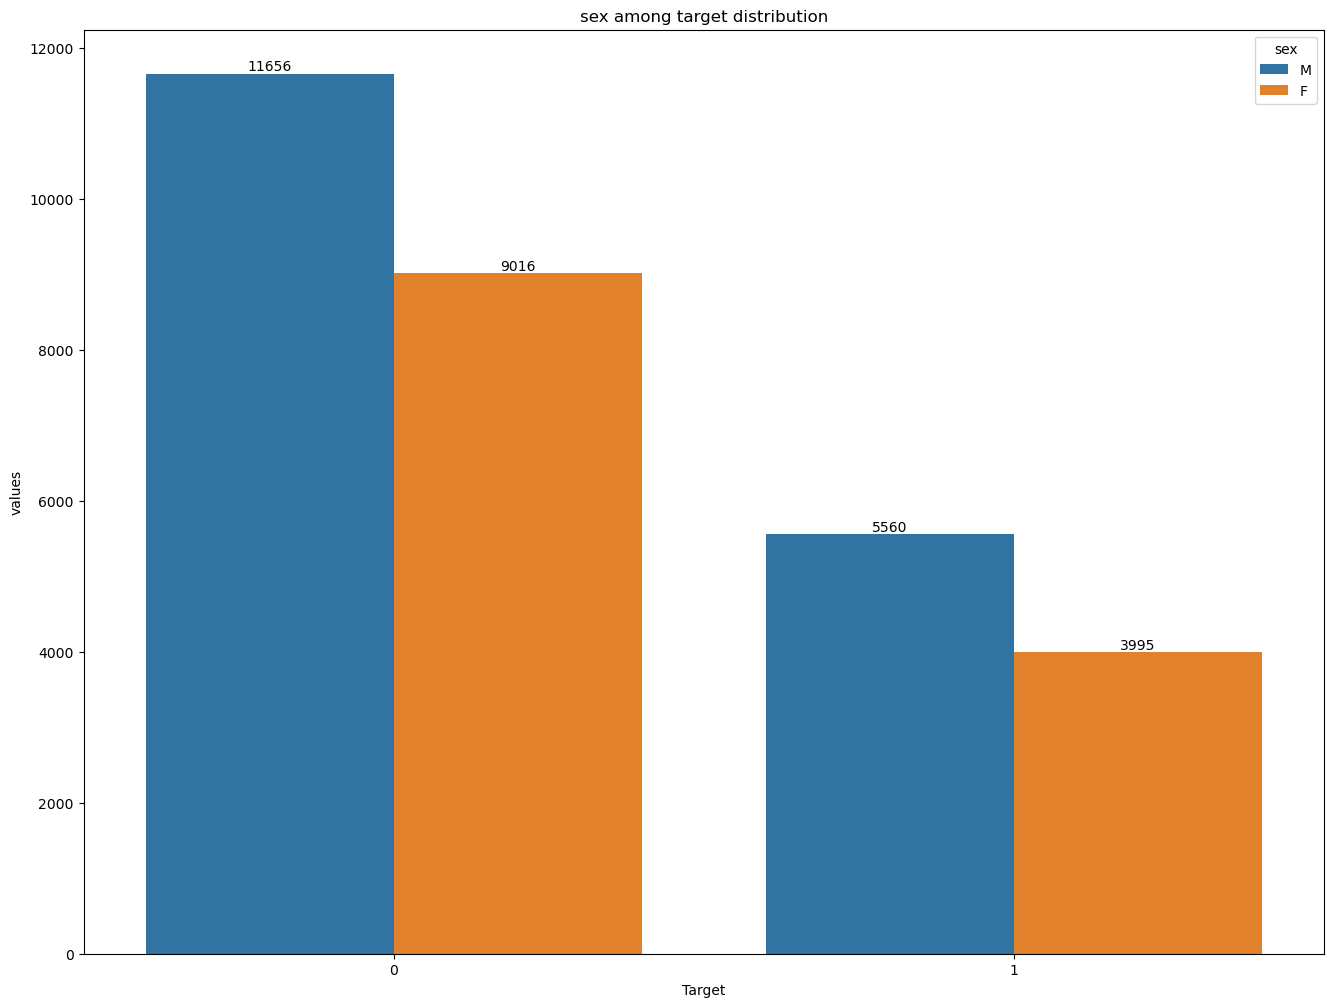

In [64]:
fig, axs = plt.subplots(figsize=(16, 12))
temp = train_data.groupby('Target')['sex'].value_counts()
data_target_class = pd.DataFrame(data={'values':temp.values}, index=temp.index).reset_index()
sns.barplot(ax = axs, x='Target', y='values', hue='sex', data=data_target_class)
for i in axs.containers:
    axs.bar_label(i,)
plt.title('sex among target distribution')
plt.show()

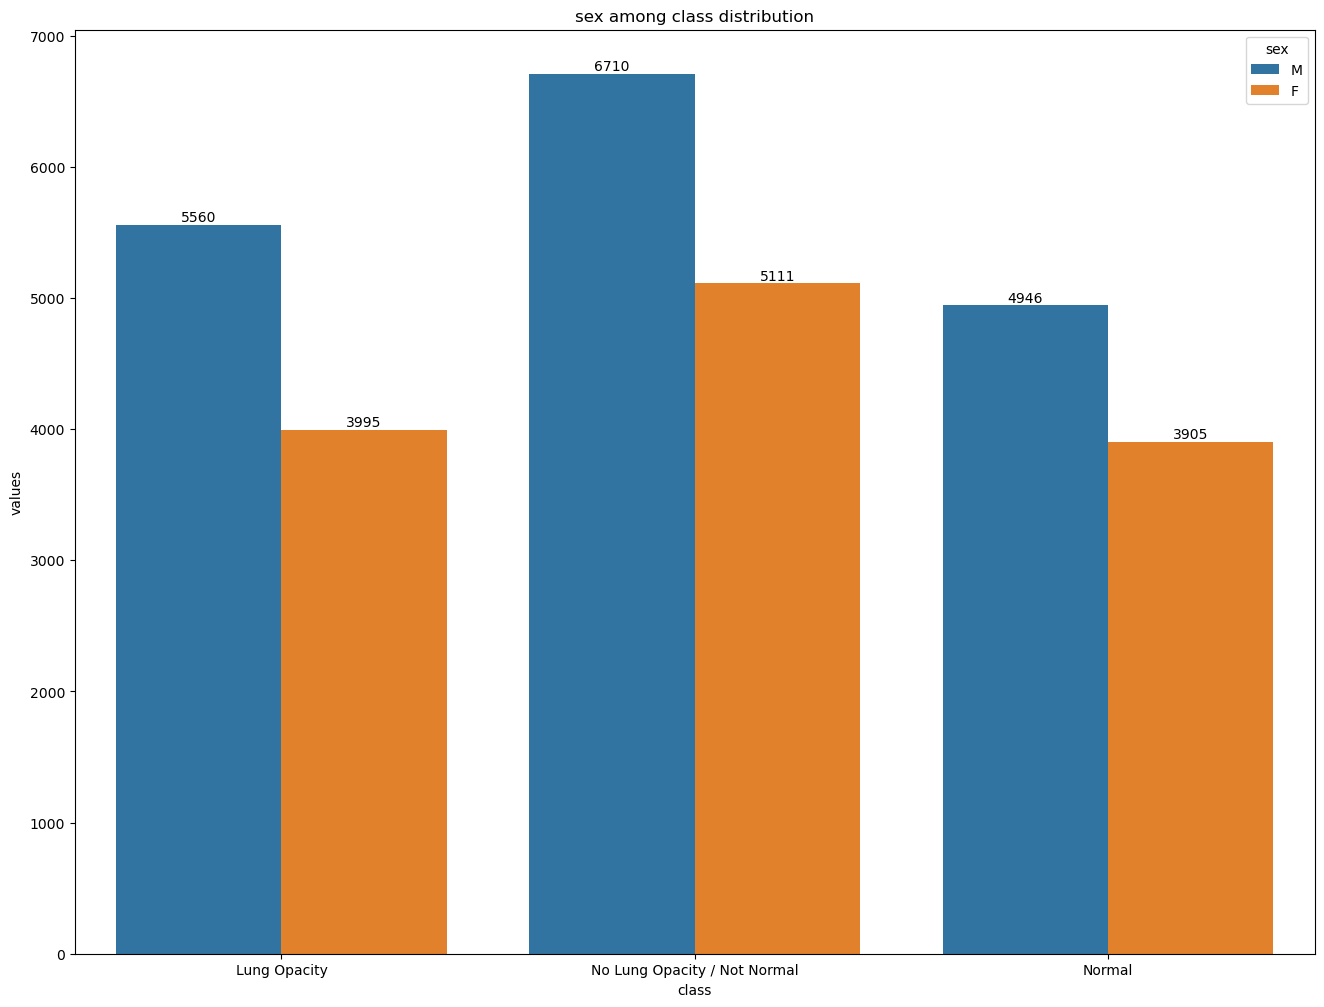

In [66]:
fig, axs = plt.subplots(figsize=(16, 12))
temp = train_data.groupby('class')['sex'].value_counts()
data_target_class = pd.DataFrame(data={'values':temp.values}, index=temp.index).reset_index()
sns.barplot(ax = axs, x='class', y='values', hue='sex', data=data_target_class)
for i in axs.containers:
    axs.bar_label(i,)
plt.title('sex among class distribution')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='age', ylabel='Density'>

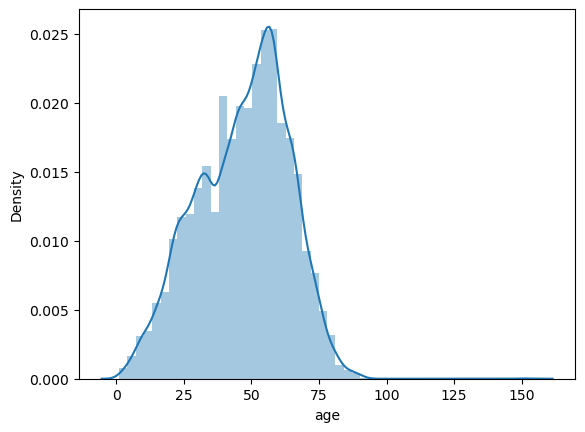

In [72]:
sns.distplot(train_data.age)

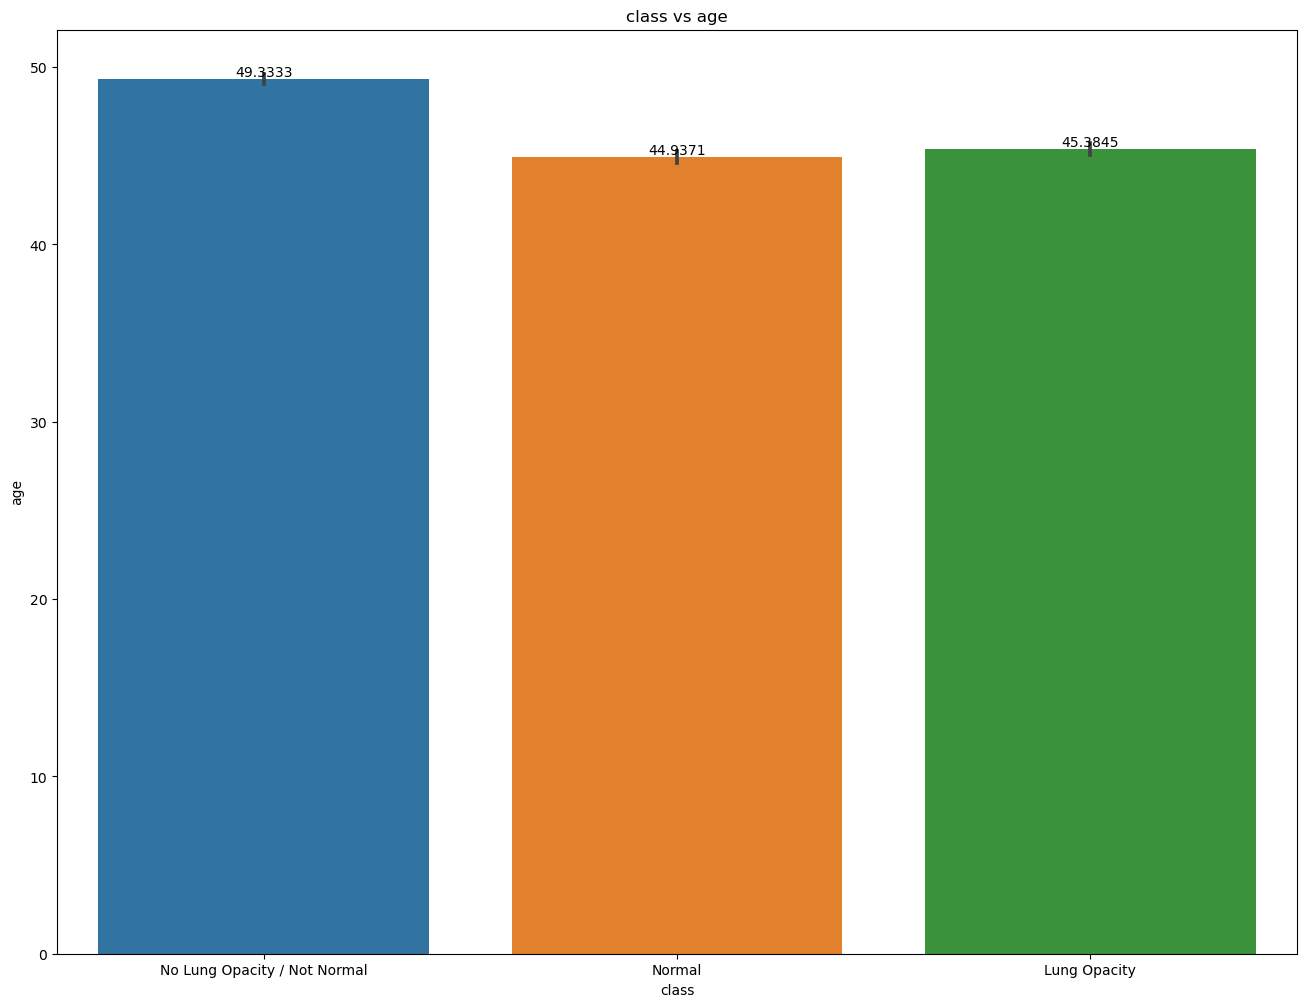

In [73]:
fig, axs = plt.subplots(figsize=(16, 12))
sns.barplot(ax=axs, x='class', y='age', data=train_data)
for i in axs.containers:
    axs.bar_label(i,)
plt.title('class vs age')
plt.show()

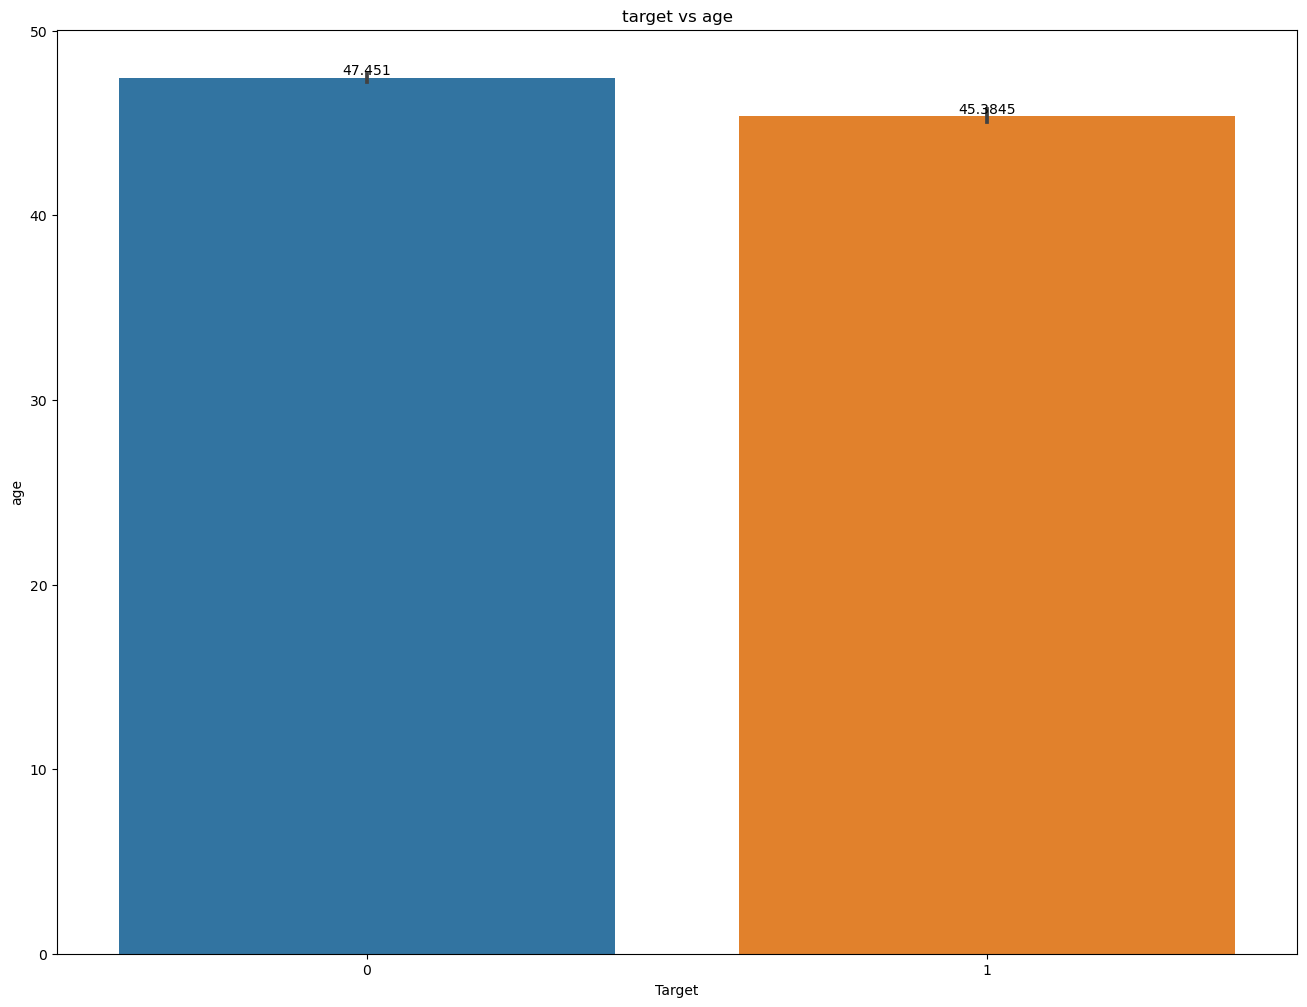

In [75]:
fig, axs = plt.subplots(figsize=(16, 12))
sns.barplot(ax=axs, x='Target', y='age', data=train_data)
for i in axs.containers:
    axs.bar_label(i,)
plt.title('target vs age')
plt.show()

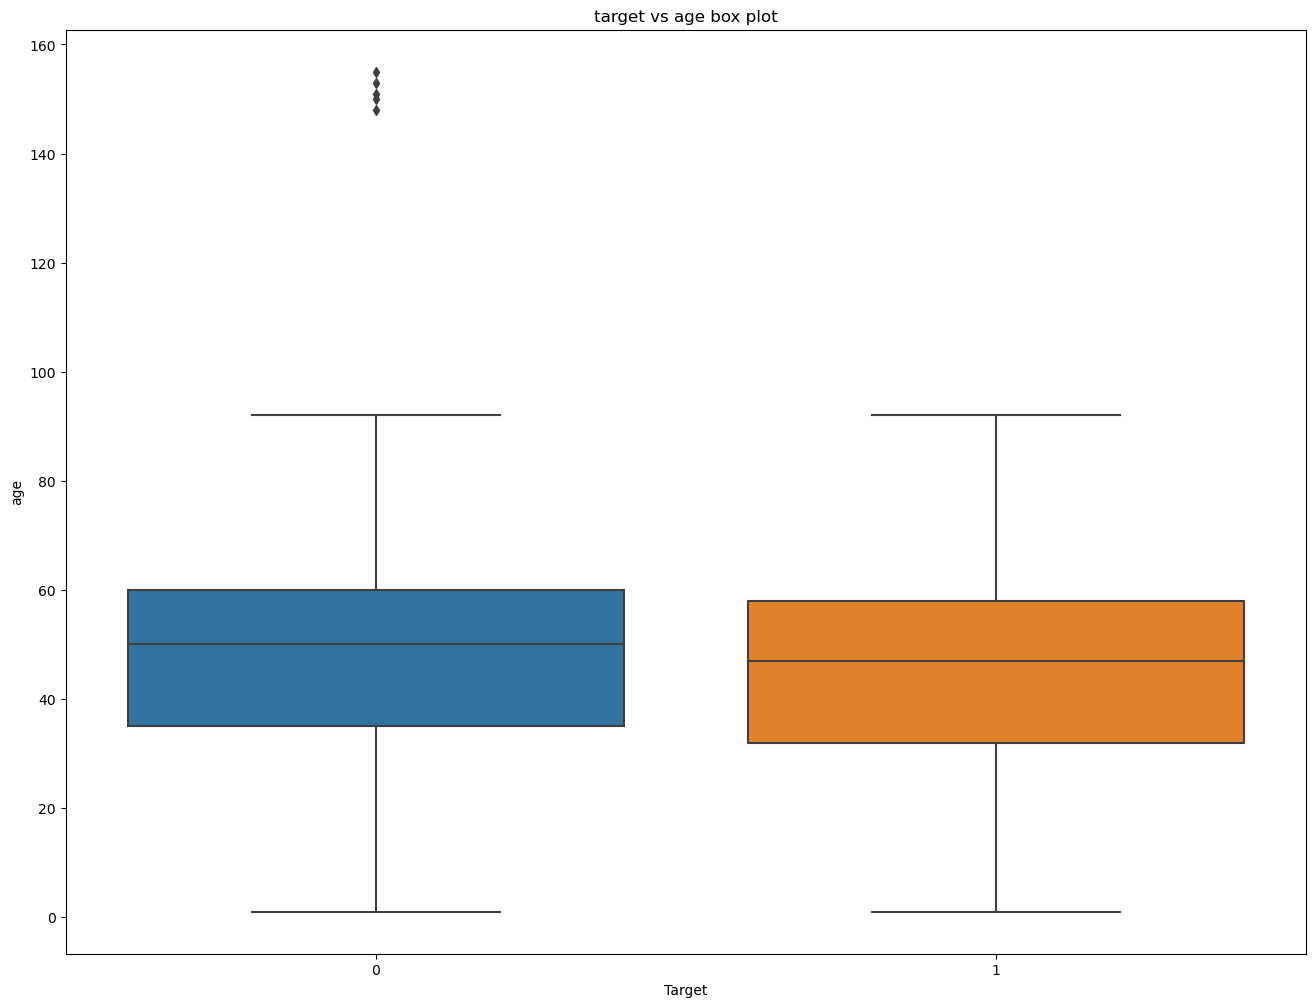

In [78]:
fig, axs = plt.subplots(figsize=(16, 12))
sns.boxplot(ax=axs, x='Target', y='age', data=train_data)
plt.title('target vs age box plot')
plt.show()

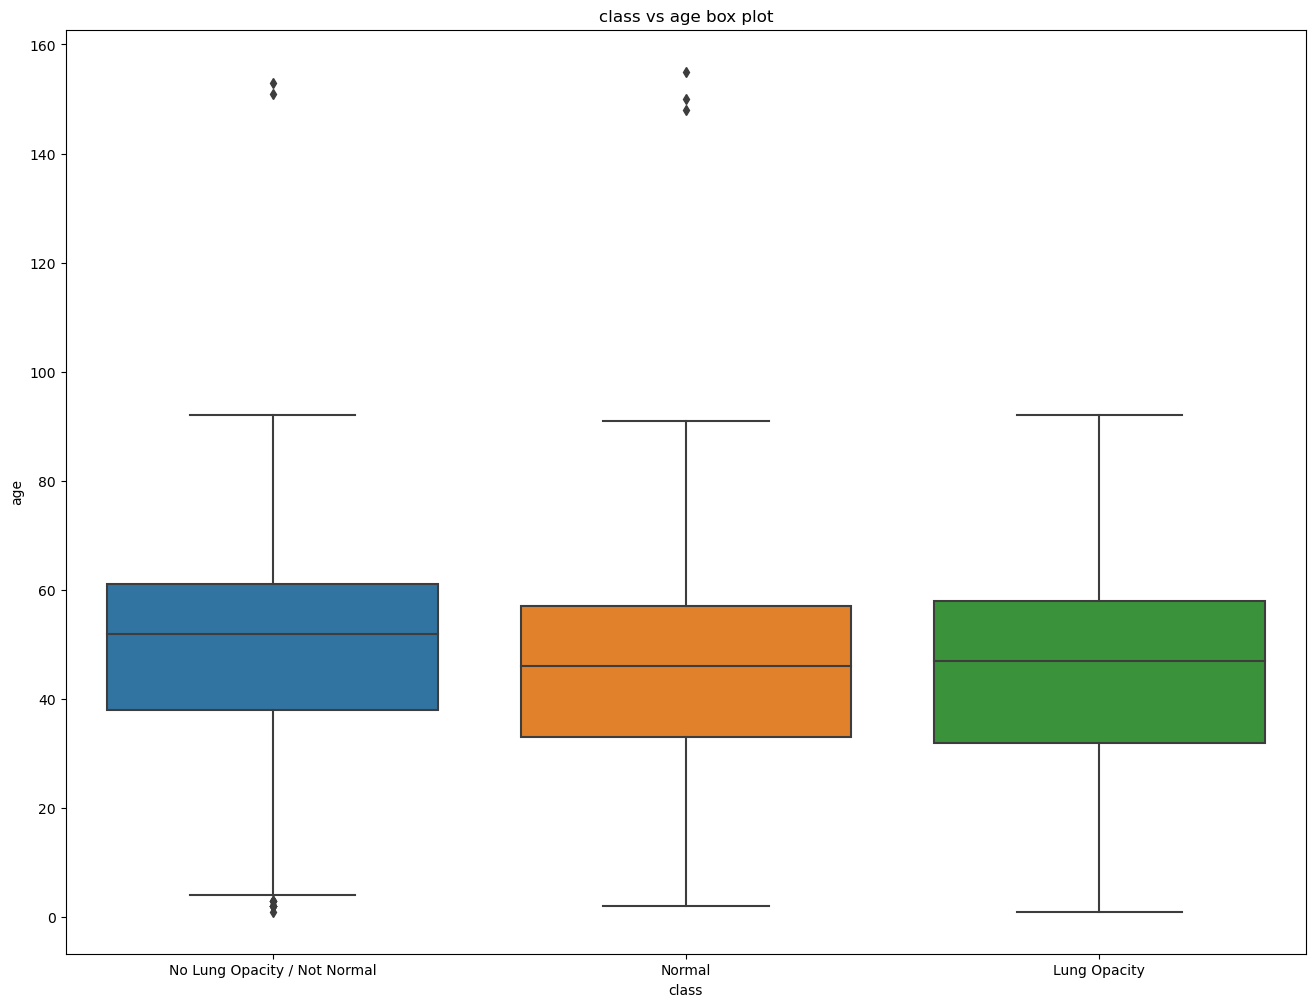

In [79]:
fig, axs = plt.subplots(figsize=(16, 12))
sns.boxplot(ax=axs, x='class', y='age', data=train_data)
plt.title('class vs age box plot')
plt.show()

Distribution of `Age`: Overall and Target = 1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


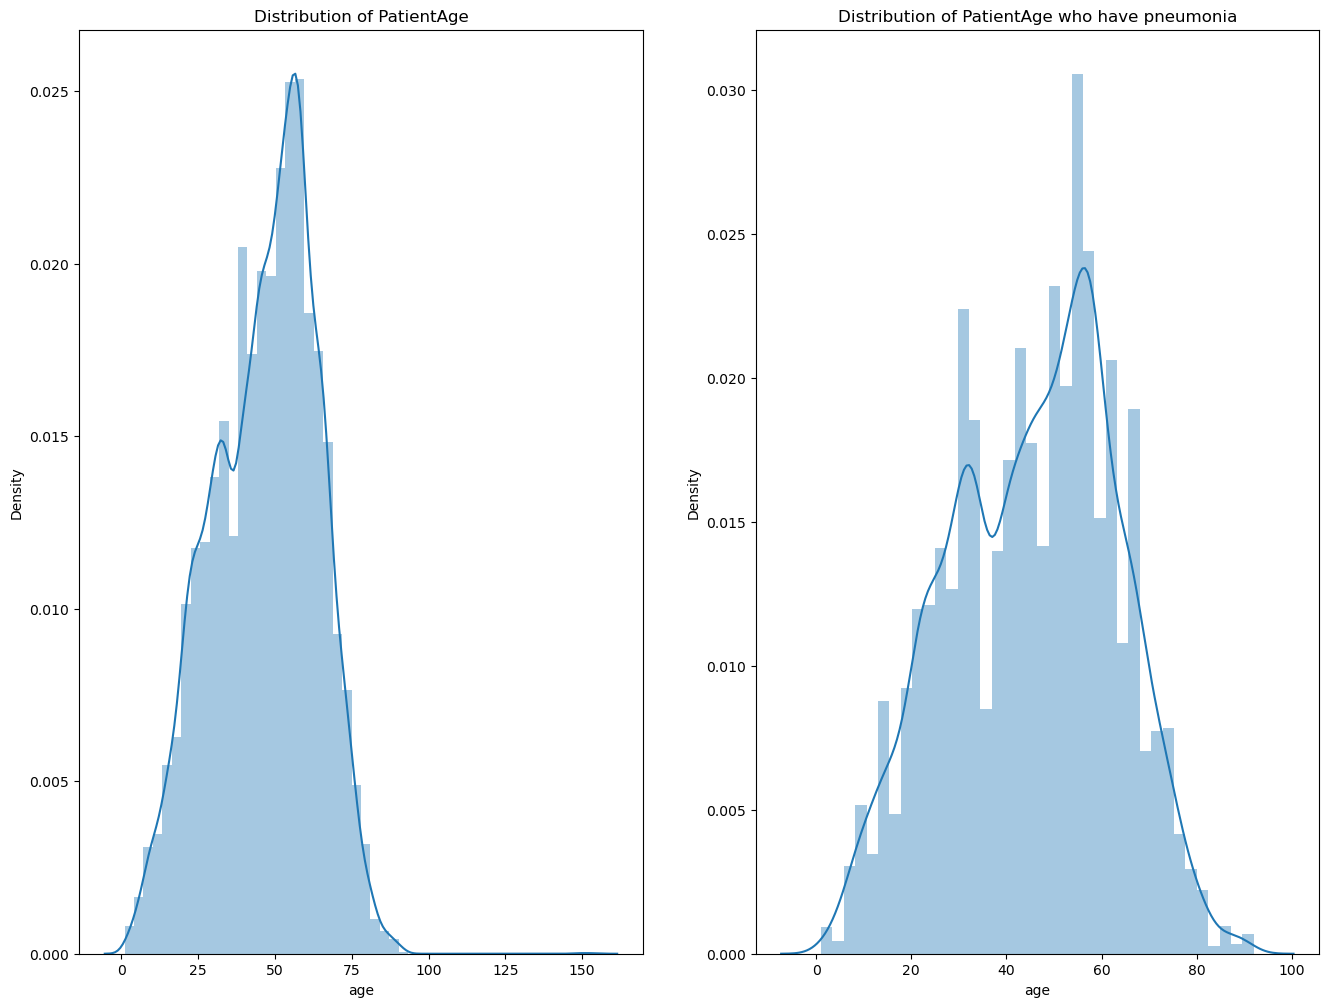

In [86]:
print('Distribution of `Age`: Overall and Target = 1')
fig = plt.figure(figsize = (16, 12))

ax = fig.add_subplot(121)
g = (sns.distplot(train_data['age']).set_title('Distribution of PatientAge'))

ax = fig.add_subplot(122)
g = (sns.distplot(train_data.loc[train_data['Target'] == 1, 'age']).set_title('Distribution of PatientAge who have pneumonia'))

plt.show()

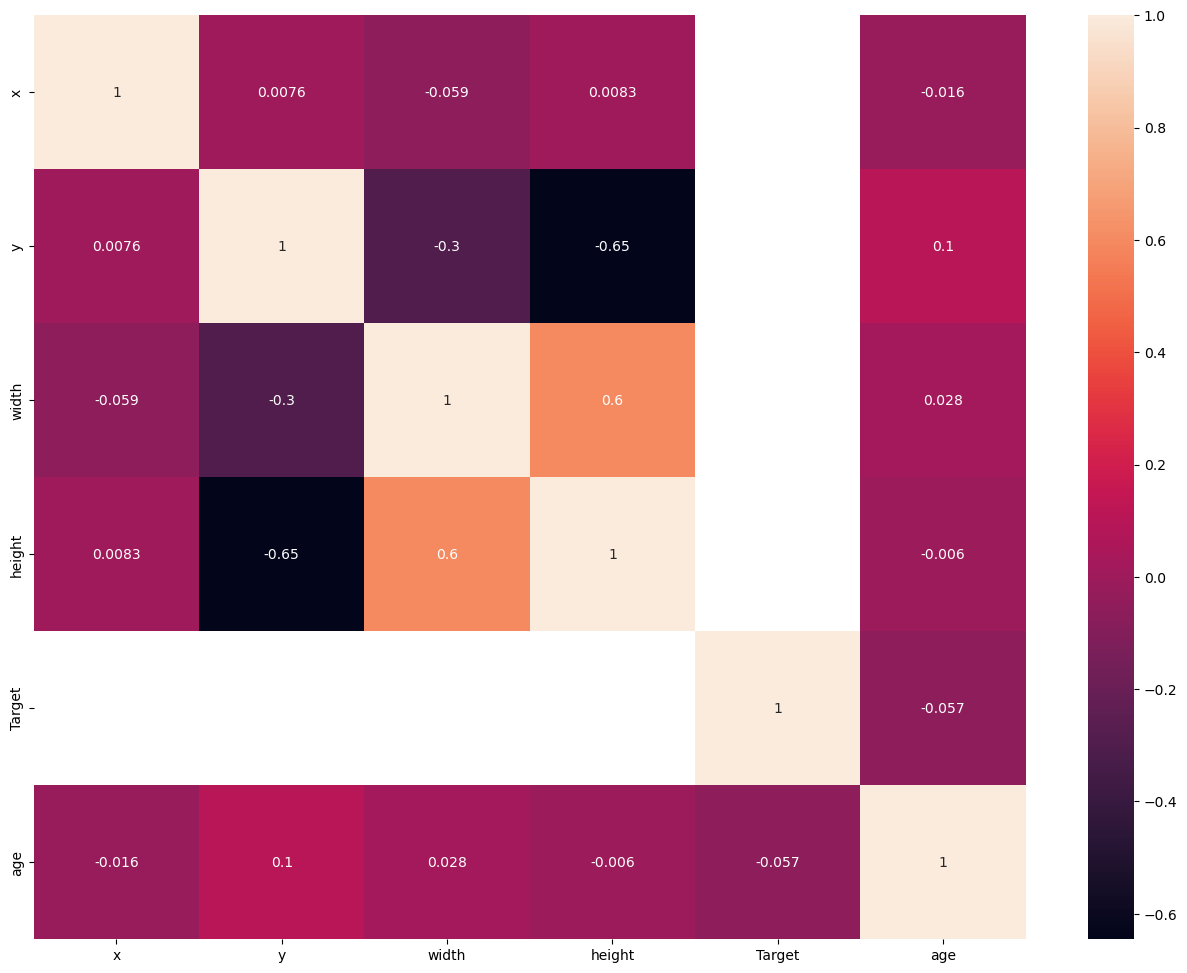

In [85]:
corr = train_data.corr()
plt.figure(figsize=(16,12))

sns.heatmap(corr,annot=True)
plt.show()